In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns


In [2]:
df1=pd.read_csv(r"C:\Users\Shaivy\Desktop\inductions\databyte\house price\MELBOURNE_HOUSE_PRICES_LESS.csv")
print(df1.head(10))

         Suburb            Address  Rooms Type      Price Method   
0    Abbotsford      49 Lithgow St      3    h  1490000.0      S  \
1    Abbotsford      59A Turner St      3    h  1220000.0      S   
2    Abbotsford      119B Yarra St      3    h  1420000.0      S   
3    Aberfeldie         68 Vida St      3    h  1515000.0      S   
4  Airport West   92 Clydesdale Rd      2    h   670000.0      S   
5  Airport West       4/32 Earl St      2    t   530000.0      S   
6  Airport West     3/74 Hawker St      2    u   540000.0      S   
7  Airport West  1/26 Highridge Cr      3    h   715000.0     SP   
8     Albanvale      1 Jackson Cct      6    h        NaN     PI   
9   Albert Park        18 Mills St      3    h  1925000.0      S   

         SellerG       Date  Postcode             Regionname  Propertycount   
0         Jellis  1/04/2017      3067  Northern Metropolitan           4019  \
1       Marshall  1/04/2017      3067  Northern Metropolitan           4019   
2         Nels

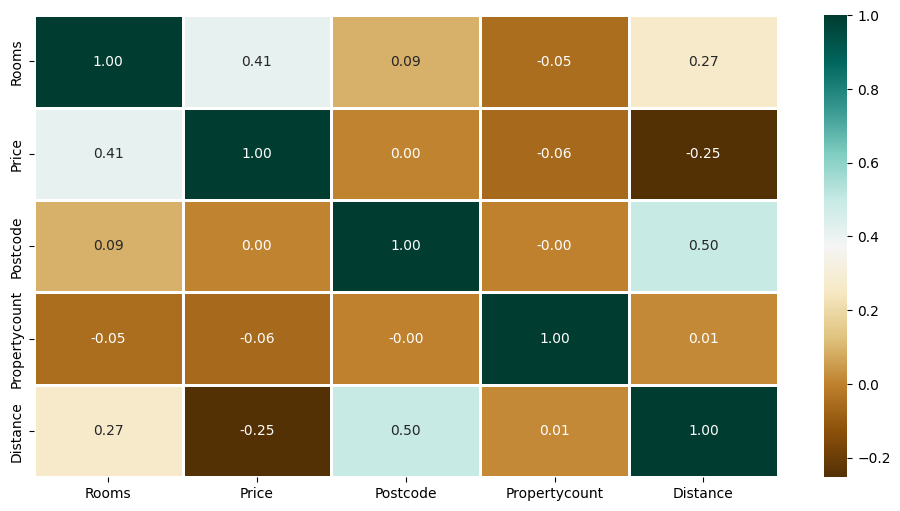

In [6]:


# Assuming df1 is your DataFrame containing both numeric and non-numeric data
# Remove non-numeric columns (assuming they are categorical)
numeric_df = df1.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Display the plot
plt.show()


In [17]:
#price is highly corelated with rooms and negatively corelated with year built
df1.shape

(63023, 13)

In [8]:
df1.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [9]:
print(14950/63023)#24 percent is a null value so will replace these null value by mean.

0.2372149850054742


In [18]:
df1['Price'] = df1['Price'].fillna(df1['Price'].mean())
df1.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [20]:
df2=df1.drop(['Type','Method','Postcode','Date','SellerG','Address'],axis='columns')
from sklearn.preprocessing import LabelEncoder
df2.shape



(63023, 7)

In [28]:
X=df2.drop('Price',axis='columns')
y=df2['Price']
print(df2.tail())
print(X.head())
print(y.head())



                 Suburb  Rooms          Price             Regionname   
63018     Roxburgh Park      3  566000.000000  Northern Metropolitan  \
63019     Roxburgh Park      3  500000.000000  Northern Metropolitan   
63020     Roxburgh Park      3  545000.000000  Northern Metropolitan   
63021        Thomastown      3  997898.241488  Northern Metropolitan   
63022  Williams Landing      4  997898.241488   Western Metropolitan   

       Propertycount  Distance              CouncilArea  
63018           5833      20.6        Hume City Council  
63019           5833      20.6        Hume City Council  
63020           5833      20.6        Hume City Council  
63021           7955      15.3  Whittlesea City Council  
63022           1999      17.6     Wyndham City Council  
         Suburb  Rooms             Regionname  Propertycount  Distance   
0    Abbotsford      3  Northern Metropolitan           4019       3.0  \
1    Abbotsford      3  Northern Metropolitan           4019       3.0 

In [29]:
le_Suburb=LabelEncoder()
le_Regionname=LabelEncoder()
le_CouncilArea=LabelEncoder()

In [30]:
X['Suburb_n']=le_Suburb.fit_transform(X['Suburb'])
X['Regionname_n']=le_Suburb.fit_transform(X['Regionname'])
X['CouncilArea_n']=le_Suburb.fit_transform(X['CouncilArea'])

In [32]:
X.head()

,Suburb,Rooms,Regionname,Propertycount,Distance,CouncilArea,Suburb_n,Regionname_n,CouncilArea_n
0,Abbotsford,3,Northern Metropolitan,4019,3.0,Yarra City Council,0,2,32
1,Abbotsford,3,Northern Metropolitan,4019,3.0,Yarra City Council,0,2,32
2,Abbotsford,3,Northern Metropolitan,4019,3.0,Yarra City Council,0,2,32
3,Aberfeldie,3,Western Metropolitan,1543,7.5,Moonee Valley City Council,1,6,22
4,Airport West,2,Western Metropolitan,3464,10.4,Moonee Valley City Council,2,6,22


In [33]:
X.drop(['Suburb','Regionname','CouncilArea'],axis='columns')

,Rooms,Propertycount,Distance,Suburb_n,Regionname_n,CouncilArea_n
0,3,4019,3.0,0,2,32
1,3,4019,3.0,0,2,32
2,3,4019,3.0,0,2,32
3,3,1543,7.5,1,6,22
4,2,3464,10.4,2,6,22
...,...,...,...,...,...,...
63018,3,5833,20.6,295,2,11
63019,3,5833,20.6,295,2,11
63020,3,5833,20.6,295,2,11
63021,3,7955,15.3,332,2,30


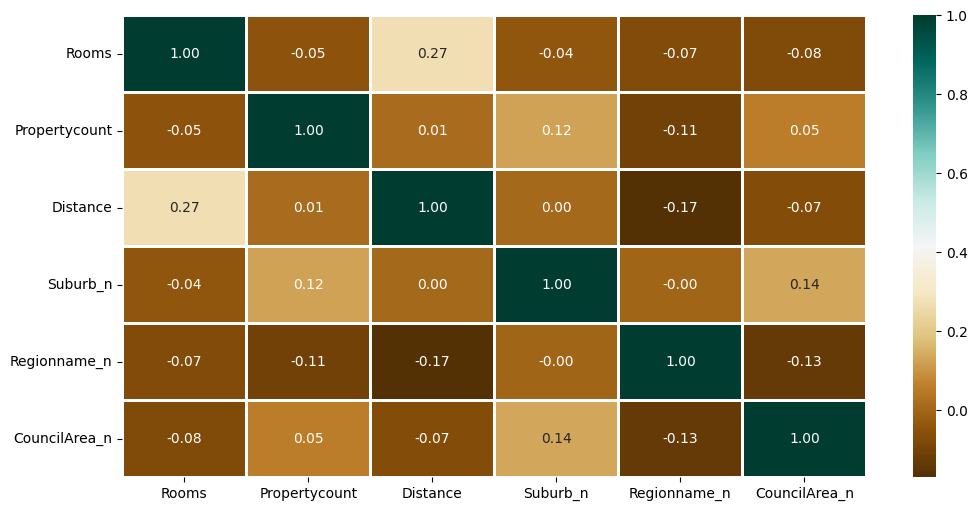

In [34]:
numeric_df = X.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Display the plot
plt.show()

In [35]:
df2['Suburb_n']=le_Suburb.fit_transform(df2['Suburb'])
df2['Regionname_n']=le_Suburb.fit_transform(df2['Regionname'])
df2['CouncilArea_n']=le_Suburb.fit_transform(df2['CouncilArea'])

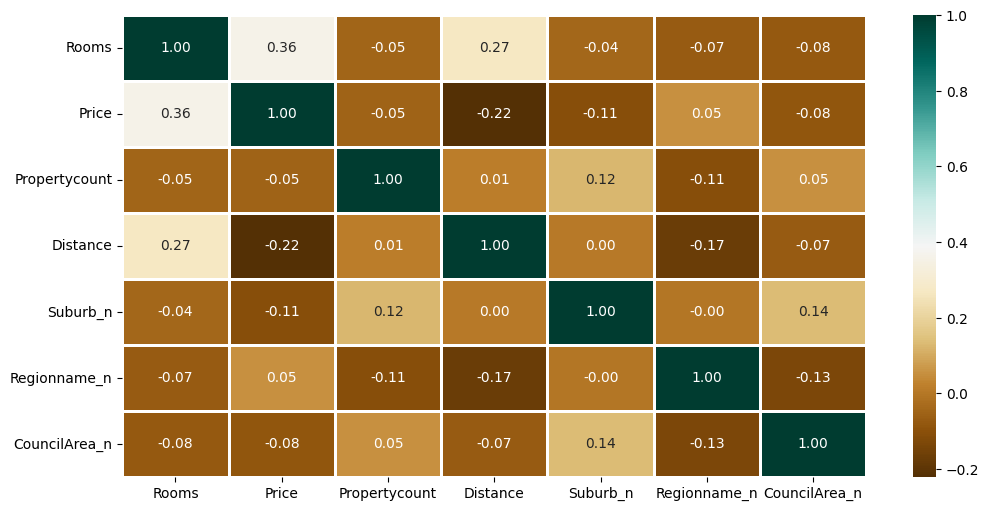

In [36]:
numeric_df = df2.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Display the plot
plt.show()


In [38]:
df2.head()

,Suburb,Rooms,Price,Regionname,Propertycount,Distance,CouncilArea,Suburb_n,Regionname_n,CouncilArea_n
0,Abbotsford,3,1490000.0,Northern Metropolitan,4019,3.0,Yarra City Council,0,2,32
1,Abbotsford,3,1220000.0,Northern Metropolitan,4019,3.0,Yarra City Council,0,2,32
2,Abbotsford,3,1420000.0,Northern Metropolitan,4019,3.0,Yarra City Council,0,2,32
3,Aberfeldie,3,1515000.0,Western Metropolitan,1543,7.5,Moonee Valley City Council,1,6,22
4,Airport West,2,670000.0,Western Metropolitan,3464,10.4,Moonee Valley City Council,2,6,22


In [41]:
df3=df2.drop(['Suburb','Regionname','CouncilArea'],axis='columns')
df3.head()

,Rooms,Price,Propertycount,Distance,Suburb_n,Regionname_n,CouncilArea_n
0,3,1490000.0,4019,3.0,0,2,32
1,3,1220000.0,4019,3.0,0,2,32
2,3,1420000.0,4019,3.0,0,2,32
3,3,1515000.0,1543,7.5,1,6,22
4,2,670000.0,3464,10.4,2,6,22


In [44]:
X=df3.drop(['Price'],axis=1)
y=df3['Price']
X.head()
y.head()

0    1490000.0
1    1220000.0
2    1420000.0
3    1515000.0
4     670000.0
Name: Price, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, Xx_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score (Xx_test,y_test)

0.24609203629424992

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_regressor.score(Xx_test, y_test)

0.4351259066794818

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_regressor.score(Xx_test, y_test)

0.44242258857000893

In [48]:
df2['Rooms'].unique()

array([ 3,  2,  6,  4,  1,  5,  7,  8, 11, 10, 12,  9, 31, 16],
      dtype=int64)

In [49]:
print(df2['Rooms']>10)

0        False
1        False
2        False
3        False
4        False
         ...  
63018    False
63019    False
63020    False
63021    False
63022    False
Name: Rooms, Length: 63023, dtype: bool
